<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  int64  
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

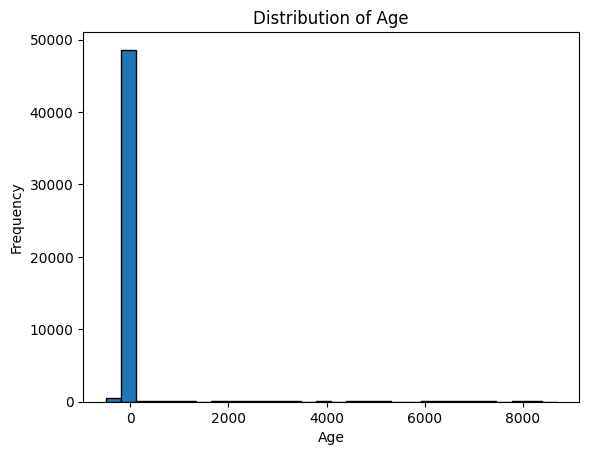

In [15]:

import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/test.csv'
data = pd.read_csv(file_path)

# Function to clean numerical columns by removing non-numeric characters
def clean_numeric(column):
    # Remove all non-digit characters except the decimal point and minus sign
    cleaned_column = pd.to_numeric(column.replace('[^\d.-]', '', regex=True), errors='coerce')
    return cleaned_column

# Clean 'Age' and 'Annual_Income' columns
data['Age'] = clean_numeric(data['Age'])
data['Annual_Income'] = clean_numeric(data['Annual_Income'])

# Impute missing values for 'Monthly_Inhand_Salary' using the median
data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].median(), inplace=True)

# Fill missing categorical values with the most frequent value (mode)
categorical_columns = ['Name', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
for column in categorical_columns:
    if data[column].dtype == 'object':  # Ensure the column is categorical before imputing
        data[column].fillna(data[column].mode()[0], inplace=True)

# Store the cleaned data in a DataFrame named 'df'
df = data

# Display the DataFrame info and first 10 rows to verify
print(df.info())
print(df.head(10))

# Optional: Continue using 'df' for further data analysis or processing
# Example analysis - Describe the dataset
print(df.describe())

# Example visualization - Histogram of 'Age'
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print(df.head(10))

       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh   24  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   
5  0x1617  CUS_0x21b1    October  Rick Rothackerj   28    #F%$D@*&8   
6  0x1618  CUS_0x21b1   November  Rick Rothackerj   28  004-07-5839   
7  0x1619  CUS_0x21b1   December  Rick Rothackerj   28  004-07-5839   
8  0x1622  CUS_0x2dbc  September           Langep   35  486-85-3974   
9  0x1623  CUS_0x2dbc    October           Langep   35  486-85-3974   

  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist       19114.12            1824.843333                  3  ...   
1  Scientist       19114.12            1824.843333            

In [ ]:
pip install plotly


In [ ]:
import plotly.express as px

# Assuming 'Month' can be used as a temporal sequence for plotting
# Make sure that 'Month' represents a meaningful and sequential order
line_chart = px.line(
    df, x='Month', y='Annual_Income',
    title='Annual Income Over Time',
    line_shape='linear',  # Change to 'spline' for smooth lines
    markers=True,
    color_discrete_sequence=px.colors.qualitative.D3  # Color palette
)
line_chart.update_layout(template='plotly_dark')
line_chart.show()


In [ ]:
scatter_plot = px.scatter(
    df, x='Age', y='Annual_Income',
    title='Age vs Annual Income',
    color='Annual_Income',  # Color points by income, can replace with another categorical variable
    color_continuous_scale=px.colors.sequential.Viridis  # Color gradient
)
scatter_plot.update_layout(template='plotly_white')
scatter_plot.show()


In [ ]:
bar_chart = px.bar(
    df, x='Occupation', y='Annual_Income',
    title='Income by Occupation',
    color='Occupation',  # Colors bars by occupation
    color_discrete_sequence=px.colors.qualitative.Plotly
)
bar_chart.update_layout(template='plotly_dark')
bar_chart.show()


In [ ]:
histogram = px.histogram(
    df, x='Age',
    nbins=30,
    title='Age Distribution',
    color_discrete_sequence=['indianred']  # Single color
)
histogram.update_layout(template='plotly_white')
histogram.show()


In [ ]:
box_plot = px.box(
    df, y='Annual_Income',
    title='Annual Income Box Plot',
    color_discrete_sequence=['magenta']  # Single color
)
box_plot.update_layout(template='plotly_dark')
box_plot.show()


In [ ]:
correlation_matrix = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']].corr()
heatmap = px.imshow(
    correlation_matrix,
    text_auto=True,
    labels=dict(x="Feature", y="Feature", color="Correlation"),
    title="Feature Correlation Heatmap",
    color_continuous_scale=px.colors.diverging.Tealrose  # Gradient color scale
)
heatmap.update_layout(template='plotly_white')
heatmap.show()
